In [1]:
import pandas as pd
import numpy as np
from pydataset import data

In [2]:
data('mpg', show_doc = True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [3]:
# Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:

mpg = data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [58]:
# On average, which manufacturer has the best miles per gallon?
cty_mpg = mpg.groupby('manufacturer').cty.mean()
hwy_mpg = mpg.groupby('manufacturer').hwy.mean()
mpg['combine'] = (mpg.cty + mpg.hwy)/2
combine_mpg = mpg.groupby('manufacturer').combine.mean()
combine_mpg[combine_mpg.max() == combine_mpg]
# # Do automatic or manual cars have better miles per gallon?

manufacturer
honda    28.5
Name: combine, dtype: float64

In [59]:
# How many different manufacturers are there?
len(mpg.manufacturer.unique())
mpg.manufacturer.nunique()

15

In [ ]:
# How many different models are there?
len(mpg.model.unique())
unique_model = mpg.model.unique()
unique_model.size

# # Do automatic or manual cars have better miles per gallon?
mpg['is_automatic'] = mpg.trans.str.startswith('a')



In [60]:
trans_avg = mpg.groupby('is_automatic').combine.agg(['count', 'mean'])
trans_avg
# trans_avg['trans_mask'] = trans_avg.index.str.startswith('a')

# trans_avg.groupby('trans_mask')

,count,mean
is_automatic,,
False,77,22.227273
True,157,19.130573


In [8]:
from env import host, user, password
db_name = "employees"
url = f"mysql+pymysql://{user}:{password}@{host}/{db_name}"

In [9]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [10]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [11]:
# Copy the users and roles dataframes from the examples above. 
# What do you think a right join would look like? An outer join? 
# What happens if you drop the foreign keys from the dataframes and try to merge them?
pd.merge(users, roles, left_on='role_id', right_on='id', how='left')


,id_x,name_x,role_id,id_y,name_y
0,1,bob,1.0,1.0,admin
1,2,joe,2.0,2.0,author
2,3,sally,3.0,3.0,reviewer
3,4,adam,3.0,3.0,reviewer
4,5,jane,NaN,NaN,NaN
5,6,mike,NaN,NaN,NaN


In [12]:
pd.merge(users, roles, left_on='role_id', right_on='id', how='outer')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


In [13]:
pd.merge(users, roles, left_on='role_id', right_on='id', how='right')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [14]:
# Getting data from SQL databases

# Create a function named get_db_url. It should accept a username, hostname, password, 
# and database name and return a url formatted like in the examples in this lesson.

db_name = "employees"

def get_db_url(db_name):
    from env import host, user, password
    url = f"mysql+pymysql://{user}:{password}@{host}/{db_name}"
    return pd.read_sql("SELECT * FROM employees", url)


# Use your function to obtain a connection to the employees database.

get_db_url(db_name)

# Once you have successfully run a query:
# Intentionally make a typo in the database url. What kind of error message do you see?

NoSuchModuleError: Can't load plugin: sqlalchemy.dialects:mysql.pmysql

# Intentionally make an error in your SQL query. What does the error message look like?
pd.read_sql("SELECT * FROM emplooyes", url)
SyntaxError: EOL while scanning string literal



SyntaxError: EOL while scanning string literal (<ipython-input-14-e562a8ea1f5d>, line 21)

In [15]:
def get_db_url(db_name):
    from env import host, user, password
    url = f"mysql+pymysql://{user}:{password}@{host}/{db_name}"
    return pd.read_sql("SELECT * FROM employees", url)

<IPython.core.display.Javascript object>


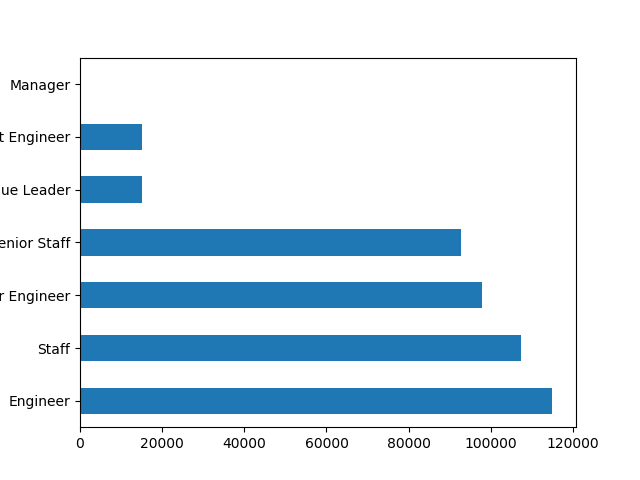

In [62]:
%matplotlib notebook
# Read the employees and titles tables into two separate dataframes
employees = pd.read_sql("SELECT * FROM employees", url)
titles = pd.read_sql("SELECT * FROM titles", url)
titles.title.value_counts().plot.barh()

In [53]:
#Non visual data for employees
never_fired = titles.to_date.max()

good_mask = titles.to_date != never_fired

valid = titles[good_mask]
valid

,emp_no,title,from_date,to_date
3,10004,Engineer,1986-12-01,1995-12-01
6,10005,Staff,1989-09-12,1996-09-12
9,10007,Staff,1989-02-10,1996-02-11
10,10008,Assistant Engineer,1998-03-11,2000-07-31
11,10009,Assistant Engineer,1985-02-18,1990-02-18
...,...,...,...,...
443297,499992,Staff,1987-05-10,1992-05-09
443299,499994,Engineer,1993-02-22,1993-10-27
443301,499996,Engineer,1996-05-13,2002-05-13
443303,499997,Engineer,1987-08-30,1992-08-29


In [57]:
from datetime import datetime
pd.to_datetime(valid.from_date, yearfirst=True)
pd.to_datetime(valid.to_date, yearfirst=True)

3        1995-12-01
6        1996-09-12
9        1996-02-11
10       2000-07-31
11       1990-02-18
            ...    
443297   1992-05-09
443299   1993-10-27
443301   2002-05-13
443303   1992-08-29
443306   1998-12-27
Name: to_date, Length: 203184, dtype: datetime64[ns]

In [ ]:
# Visualize the number of employees with each title.
titles.groupby('title').emp_no.count()
titles[titles.to_date == titles.to_date.max()].groupby('title').emp_no.count()
# Visualize how frequently employees change titles.
# For each title, find the hire date of the employee that was hired most recently with that title.
# Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL and python/pandas code)


In [ ]:
# Join the employees and titles dataframes together.
merged = pd.merge(employees, titles, left_on='emp_no', right_on='emp_no', how='outer')
merged.head(5)

In [ ]:
# Visualize how frequently employees change titles.
import matplotlib as plt
#Find the highest date that isn't 9999 (datetime.date(2002, 8, 1))
change_date = titles.to_date[titles.to_date != titles.to_date.max()].max()
change_date

In [ ]:

titles['date_bool'] = titles.to_date == titles.to_date.max()
date_bool
max_date = titles.to_date.max()

In [ ]:
pd.to_datetime()

In [ ]:
import datetime

titles.to_date.apply(lambda n: change_date if max_date else n)


In [ ]:
# titles.to_date.astype('datetime')

# df['ds'] = pd.to_datetime(df['ds'])

titles.to_date = pd.to_datetime(titles.to_date)
titles.from_date = pd.to_datetime(titles.from_date)

In [ ]:
titles['title_length'] = (titles.to_date - titles.from_date)

In [ ]:
# For each title, find the hire date of the employee that was hired most recently with that title.
titles.groupby('title').from_date.max()

In [ ]:
# Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL and python/pandas code)
department = pd.read_sql("SELECT * FROM departments JOIN dept_emp USING(dept_no)", url)
title_dep_merge = pd.merge(department, titles, left_on='emp_no', right_on='emp_no', how='left')
title_dep_merge.head(5)
pd.crosstab(title_dep_merge.dept_name, title_dep_merge.title)


In [74]:
# Use your get_db_url function to help you explore the data from the chipotle database.
# Use the data to answer the following questions:

db_name = "chipotle"
from env import host, user, password
url = f"mysql+pymysql://{user}:{password}@{host}/{db_name}"


orders = pd.read_sql("SELECT * FROM orders", url)
orders

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


In [81]:
# What is the total price for each order?
orders.item_price = orders.item_price.str.replace("$","").astype(float)
orders.item_price

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [76]:
orders.groupby('order_id').item_price.sum()

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

In [90]:
# What are the most popular 3 items?

orders.groupby('item_name').quantity.sum().nlargest(3)

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Name: quantity, dtype: int64

In [78]:
# Which item has produced the most revenue?

nwo = pd.DataFrame([])
nwo['num_sold'] = orders.groupby('item_name').item_name.count()
nwo['tot_quantity'] = orders.groupby('item_name').quantity.sum()
nwo['item_price'] = orders.groupby('item_name').item_price.mean()
nwo['item_revenue'] = nwo['tot_quantity'] * nwo['item_price']
nwo.item_revenue.sort_values(ascending=False)
nwo

,num_sold,tot_quantity,item_price,item_revenue
item_name,,,,
6 Pack Soft Drink,54,55,6.610185,363.560185
Barbacoa Bowl,66,66,10.187273,672.360000
Barbacoa Burrito,91,91,9.832418,894.750000
Barbacoa Crispy Tacos,11,12,10.928182,131.138182
Barbacoa Salad Bowl,10,10,10.640000,106.400000
Barbacoa Soft Tacos,25,25,10.018400,250.460000
Bottled Water,162,211,1.867654,394.075062
Bowl,2,4,14.800000,59.200000
Burrito,6,6,7.400000,44.400000


In [95]:
orders.groupby('item_name').item_price.sum().nlargest()

item_name
Chicken Bowl           7342.73
Chicken Burrito        5575.82
Steak Burrito          3851.43
Steak Bowl             2260.19
Chips and Guacamole    2201.04
Name: item_price, dtype: float64